In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_data = pd.read_json('ultimate_data_challenge.json')

In [3]:
len(user_data)

50000

In [4]:
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
# Checking whether our service operates solely in Westeros
user_data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [6]:
# For easy reference
user_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [7]:
user_data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [8]:
# Change the dates from strings to datetimes
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'])
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'])

In [9]:
user_data.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [10]:
# Check for missing values
user_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [11]:
# Replace null values for phones with the word "None"
user_data['phone'] = user_data['phone'].fillna('None')

In [12]:
user_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [13]:
# Automate pie chart creation
def pie_chart(feature=None,title=None,df=user_data):
    '''Create a pie chart of a categorical feature from dataframe'''
    if not feature:
        raise Exception("No feature chosen")
    values = df[feature].unique()
    counts = []
    for value in values:
        counts.append(len(df[df[feature] == value]))
    if sum(counts) != len(df):
        raise Exception('Some data is missing')
    plt.pie(counts, labels=values,autopct='%1.1f%%')
    if not title:
        title = "Users' " + feature
    plt.title(title)
    plt.show()

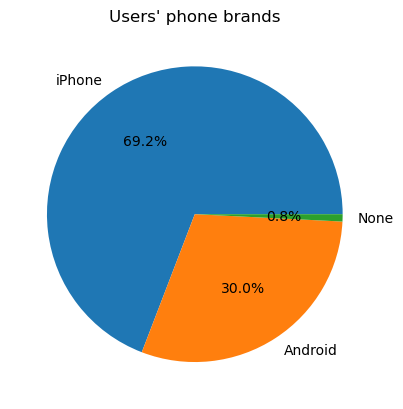

In [72]:
pie_chart('phone',"Users' phone brands")

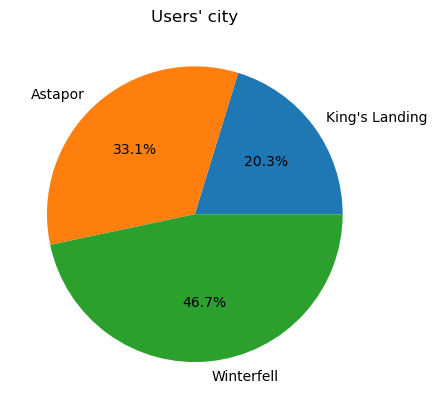

In [70]:
pie_chart('city')

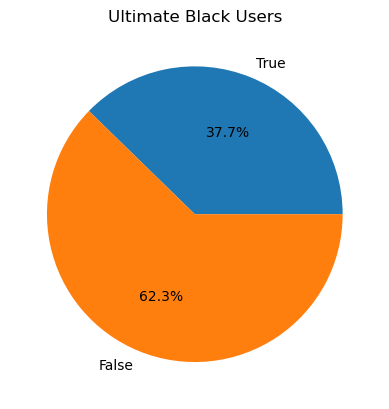

In [75]:
pie_chart('ultimate_black_user',"Ultimate Black Users")

In [105]:
# For ease of calculations, since a month isn't always 30 days but all of our users signed up in January
user_data['six_months'] = user_data['signup_date'].apply(lambda x: pd.to_datetime('{}-07-{}'.format(x.year,x.day)))

In [112]:
# Find our target feature: Whether a user has taken a ride within 30 days after 6 months
user_data['active'] = user_data['six_months'] - user_data['last_trip_date'] < pd.Timedelta('30 days')

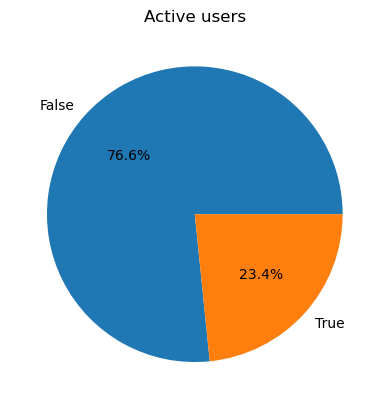

In [115]:
pie_chart('active','Active users')